In [1]:
# requisitos
!pip install scikit-learn
!pip install pandas

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [3]:
# Cargar el CSV
archivo_csv = os.path.join('..', '..', 'data', 'fact_licitacion-2007_2023-full.csv')
df_csv = pd.read_csv(archivo_csv, encoding="ISO-8859-1", delimiter=",")

In [4]:
df = df_csv.copy()

In [5]:
df.dtypes

id_fecha                       int64
id_rubro                       int64
id_sector                      int64
id_organismo                   int64
id_unidad                      int64
id_producto                    int64
id_zona                        int64
codigo_moneda                  int64
cantidad_adjudicada          float64
monto_unitario_oferta_usd    float64
monto_adjudicado_usd         float64
dtype: object

In [6]:
# Convertir la fecha a tipo datetime
df['fecha'] = pd.to_datetime(df['id_fecha'], format='%Y%m%d')

In [7]:
df['licitado'] = 1
df = df[['fecha', 'id_producto', 'licitado']]

In [8]:
print(f'registros duplicados: {df.duplicated().sum()}')
df = df.drop_duplicates()
print(f'arreglo final: {df.shape}')
df.head()

registros duplicados: 7650378
arreglo final: (4476080, 3)


,fecha,id_producto,licitado
0,2007-01-05,51101720,1
2,2007-01-05,51101811,1
3,2007-01-05,51101815,1
5,2007-01-05,51131607,1
6,2007-01-05,51141502,1


In [9]:
df.dtypes

fecha          datetime64[ns]
id_producto             int64
licitado                int64
dtype: object

# Añadir días sin licitación

In [10]:
# Todos los dias del calendario
all_dates = pd.date_range(start=df['fecha'].min(), end=df['fecha'].max(), freq='D')
all_dates.shape

(6021,)

In [11]:
# Todos los productos
all_products = df['id_producto'].unique()
all_products.shape

(16423,)

In [12]:
# Todas las combinaciones de productos y fechas
all_combinations = pd.MultiIndex.from_product([all_dates, all_products], names=['fecha', 'id_producto'])
print(all_combinations.shape)
all_data = pd.DataFrame(index=all_combinations).reset_index()
print(all_data.shape)
all_data.head()

(98882883,)
(98882883, 2)


,fecha,id_producto
0,2007-01-05,51101720
1,2007-01-05,51101811
2,2007-01-05,51101815
3,2007-01-05,51131607
4,2007-01-05,51141502


In [13]:
# Combina el DataFrame creado con tu DataFrame original
merged_df = pd.merge(all_data, df, how='left', on=['fecha', 'id_producto'])
merged_df.head()

,fecha,id_producto,licitado
0,2007-01-05,51101720,1.0
1,2007-01-05,51101811,1.0
2,2007-01-05,51101815,1.0
3,2007-01-05,51131607,1.0
4,2007-01-05,51141502,1.0


In [14]:
merged_df['licitado'].unique()

array([ 1., nan])

In [15]:
# Rellena los valores faltantes con ceros en la columna 'licitacion'
merged_df['licitado'].fillna(0, inplace=True)

In [16]:
merged_df['licitado'].unique()

array([1., 0.])

In [17]:
merged_df.dtypes

fecha          datetime64[ns]
id_producto             int64
licitado              float64
dtype: object

In [18]:
merged_df['licitado'] = merged_df['licitado'].astype(int)

In [19]:
merged_df.dtypes

fecha          datetime64[ns]
id_producto             int64
licitado                int32
dtype: object

In [20]:
merged_df['dia'] = merged_df['fecha'].dt.day
merged_df['mes'] = merged_df['fecha'].dt.month
merged_df['año'] = merged_df['fecha'].dt.year

In [21]:
merged_df.dtypes

fecha          datetime64[ns]
id_producto             int64
licitado                int32
dia                     int32
mes                     int32
año                     int32
dtype: object

In [22]:
merged_df.shape

(98882883, 6)

# Probar Modelos

In [23]:
# Dividir el conjunto de datos en características (X) y objetivo (y)
X = merged_df[['año', 'mes', 'dia', 'id_producto']]
y = merged_df['licitado']

In [24]:
merged_df['licitado'].unique()

array([1, 0])

In [25]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Tamaño set de entrenamientos: X: {X_train.shape} y: {y_train.shape}')
print(f'Tamaño set de validacion: X: {X_valid.shape} y: {y_valid.shape}')
print(f'Tamaño set de prueba: X: {X_test.shape} y: {y_test.shape}')

Tamaño set de entrenamientos: X: (79106306, 4) y: (79106306,)
Tamaño set de validacion: X: (9888288, 4) y: (9888288,)
Tamaño set de prueba: X: (9888289, 4) y: (9888289,)


In [26]:
# X_train.unique()
y_train.unique()

array([0, 1])

In [27]:
# X_train.unique()
y_test.unique()

array([0, 1])

In [28]:
y_valid.unique()

array([0, 1])

In [29]:
# Linear Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# Ensemble Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Support Vector Machines SVM
from sklearn.svm import SVC
# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Neural Networks
from sklearn.neural_network import MLPClassifier
# Others
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

# Modelos
models = [
# Linear Models
    ('Logistic Regression', LogisticRegression(verbose=1)),
#    ('SDG', SGDClassifier(verbose=1)),
# Support Vector Machines SVM
    ('Support Vector Machine', SVC(verbose=1)),
# Nearest Neighbors
    ('K-Nearest Neighbors', KNeighborsClassifier()),
# Naive Bayes
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
# Decision Trees
    ('Decision Tree Classifier', DecisionTreeClassifier()),
# Neural Networks
    ('Multi-layer Perceptron (MLP) Classifier', MLPClassifier(verbose=1)),
# Others
    ('Quadratic Discriminant Analysis (QDA)', QuadraticDiscriminantAnalysis()),
#    ('Voting Classifier', VotingClassifier())
# Ensemble Models
    ('Random Forest', RandomForestClassifier(verbose=1)),
    ('Gradient Boosting', GradientBoostingClassifier(verbose=1)),
    ('AdaBoost', AdaBoostClassifier()),
]

In [30]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    print(f"\n{model_name}:")
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones
    predictions = model.predict(X_test)
    print(f'predicciones: {predictions}')
    # Calcular el Mean Squared Error
    mse = mean_squared_error(y_test, predictions)

    # Evaluación del modelo
    print("Accuracy:", accuracy_score(y_test, predictions))
    print(f'Mean Squared Error: {mse}')
    print("Classification Report:\n", classification_report(y_test, predictions))

    # Matriz de confusión
    cm = pd.crosstab(index=y_test, columns=predictions, rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
 


Logistic Regression:
predicciones: [0 0 0 ... 0 0 0]
Accuracy: 0.954771548444832
Mean Squared Error: 0.045228451555167935


c:\Users\victo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98   9441057
           1       0.00      0.00      0.00    447232

    accuracy                           0.95   9888289
   macro avg       0.48      0.50      0.49   9888289
weighted avg       0.91      0.95      0.93   9888289



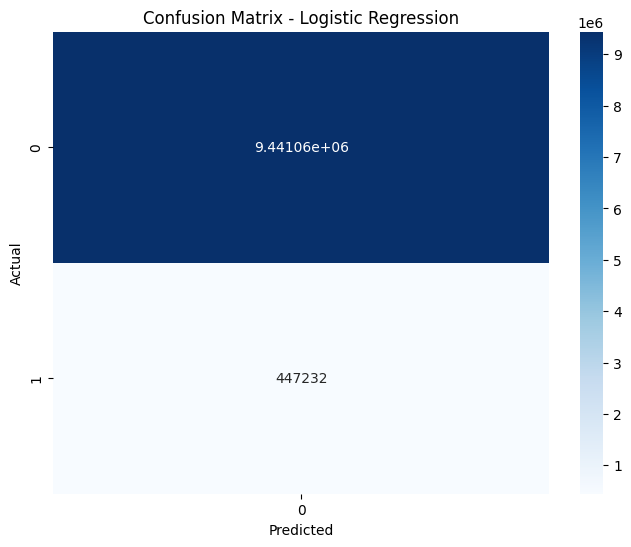


Support Vector Machine:
[LibSVM]

In [31]:
for model_name, model in models:
    train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name)